# Leitura e operação em ficheiros CSV

Trabalho desenvolvido por Rui Gonçalves (A101759) a 2024-02-09

## Descrição

Ler um ficheiro no formato CSV e calcular alguns resultados do mesmo, nomeadamente:

1. Lista ordenada alfabeticamente das modalidades desportivas;
2. Percentagens de atletas aptos e inaptos para a prática desportiva;
3. Distribuição de atletas por escalão etário (escalão = intervalo de 5 anos): ... \[30-34], \[35-39], ...

O ficheiro `emd.csv` contêm o seguinte cabeçalho como primeira linha:

```CSV
_id,index,dataEMD,nome/primeiro,nome/último,idade,género,morada,modalidade,clube,email,federado,resultado
```

## Trabalho desenvolvido

In [1]:
import matplotlib.pyplot as plt # Apresentação de resultados
import csv # Comparação para com o módulo CSV

### Processamento

Começamos por criar algumas constantes para guardar a informação relativa ao nome do ficheiro e aos indices das colunas de interesse.

In [2]:
DATA_FILENAME = 'data/emd.csv'

IDADE = 5
MODALIDADE = 8
RESULTADO = 12

Abrimos o ficheiro e ignoramos a linha do cabeçalho. 

In [3]:
data = open(DATA_FILENAME)

_ = next(data)

Percorremos todas as linhas restantes do ficheiro e calculamos os resultados.

In [4]:
modalidades = set()
aptos = 0
escaloes = [0 for _ in range(20)]
qtd = 0

for line in data:
    l = line.split(',')
    
    modalidades.add(l[MODALIDADE])
    aptos += l[RESULTADO].strip() == 'true'
    escalao = int(l[IDADE]) // 5
    escaloes[escalao] += 1
    
    qtd += 1

modalidades = sorted(modalidades)
aptos = aptos * 100. / qtd

### Resultados

#### Modalidades

In [5]:
print(modalidades)

['Andebol', 'Atletismo', 'BTT', 'Badminton', 'Basquetebol', 'Ciclismo', 'Dança', 'Equitação', 'Esgrima', 'Futebol', 'Karaté', 'Orientação', 'Parapente', 'Patinagem', 'Triatlo']


#### Aptidão

In [6]:
print(aptos, '%')

54.0 %


#### Escalões

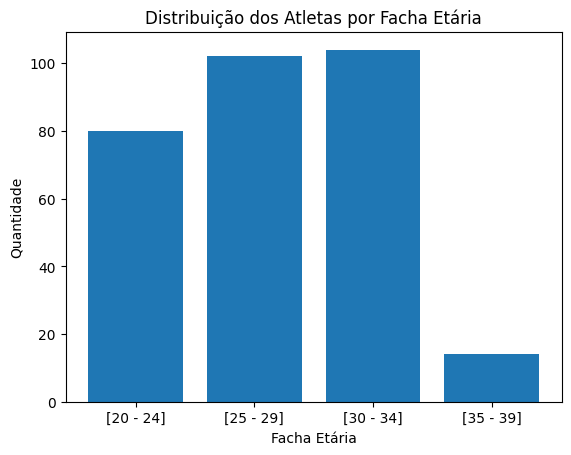

In [7]:
lables = [f'[{i*5} - {(i+1)*5-1}]' for i in range(len(escaloes))]
data = list(zip(escaloes, lables))

# Strip data
while data[0][0] == 0:
    data.pop(0)
while data[-1][0] == 0:
    data.pop(-1)

# Plot
e, l = zip(*data)

plt.bar(l, e)

plt.xlabel('Facha Etária')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Atletas por Facha Etária')

plt.show()

### Comparação com módulo CSV

In [8]:
modalidades = set()
aptos = 0
escaloes = [0 for _ in range(20)]
qtd = 0

for l in csv.reader(data):    
    modalidades.add(l[MODALIDADE])
    aptos += l[RESULTADO].strip() == 'true'
    escalao = int(l[IDADE]) // 5
    escaloes[escalao] += 1
    
    qtd += 1

modalidades = sorted(modalidades)
aptos = aptos * 100. / qtd

Por observação podemos verificar que as unicas alterações encontram-se no ciclo `for`, sendo que no original, liamos a linha e ainda tinahmos que dividir no caracter da vírgula, enquanto no módulo do CSV esse já é tratado automaticamente.